# Análise Estatística Univariada

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
df = pd.read_csv('./brasilian-houses-to-rent/houses_to_rent_v2.csv')

In [160]:
df.shape

(10692, 13)

In [161]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [163]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [164]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [165]:
df.rename(columns={'rent amount (R$)':'valor_aluguel'}, inplace=True)

In [166]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


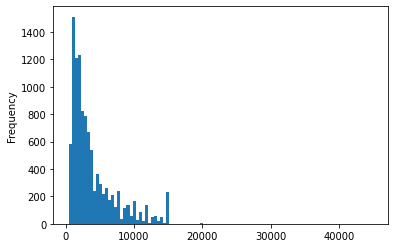

In [167]:
df['valor_aluguel'].plot(kind = 'hist', bins=100)

In [168]:
df['valor_aluguel'].skew()

1.8388773035440982

In [169]:
df['valor_aluguel'].kurtosis()

4.624228179818687

### Perguntas
- Qual a cidade com média de aluguel mais alta?
- Quantos banheiros existem nas residências com aluguéis mais altos?
- Os imóveis mais caros aceitam animais?
- Os imóveis mais caros são mobiliados?

```Atentar para obter dados que não estejam na base mas estejam disponíveis am outro lugar.```

In [170]:
# Qual a cidade com média de aluguel mais alta?
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending=False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [171]:
# Quantos banheiros existem nas residências com aluguéis mais altos?
## definição: aluguéis mais altos são valores maiores que 5000
df[df['valor_aluguel'] > 5000]['bathroom'].value_counts()

4     703
3     575
2     448
5     443
6     174
1     104
7      74
8      11
9       4
10      3
Name: bathroom, dtype: int64

In [172]:
# Quantos banheiros existem em média nas residências com aluguéis mais altos?
df[df['valor_aluguel'] > 5000]['bathroom'].mean()

3.7290271760535645

In [173]:
# Os imóveis mais caros aceitam animais?
df[df['valor_aluguel'] > 5000]['animal'].value_counts(normalize='index')

acept        0.820796
not acept    0.179204
Name: animal, dtype: float64

In [174]:
# Os imóveis mais caros são mobiliados?
df[df['valor_aluguel'] > 5000]['furniture'].value_counts(normalize='index')

not furnished    0.654195
furnished        0.345805
Name: furniture, dtype: float64

### Hipóteses
- São Paulo é a cidade com aluguel mais caro.
- Quanto mais banheiros em um imóvel, mais caro o aluguel.
- Os imóveis com mobília tem aluguel mais caro.

```Sempre se questionar acerca das 'verdades absolutas'```

In [175]:
df[['valor_aluguel', 'bathroom']].corr('spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [176]:
df.select_dtypes('int64').corrwith(df['valor_aluguel']).sort_values(ascending=False)

valor_aluguel          1.000000
fire insurance (R$)    0.987343
bathroom               0.668504
parking spaces         0.578361
rooms                  0.541758
total (R$)             0.264490
area                   0.180742
property tax (R$)      0.107884
hoa (R$)               0.036490
dtype: float64

# Visualização de Dados

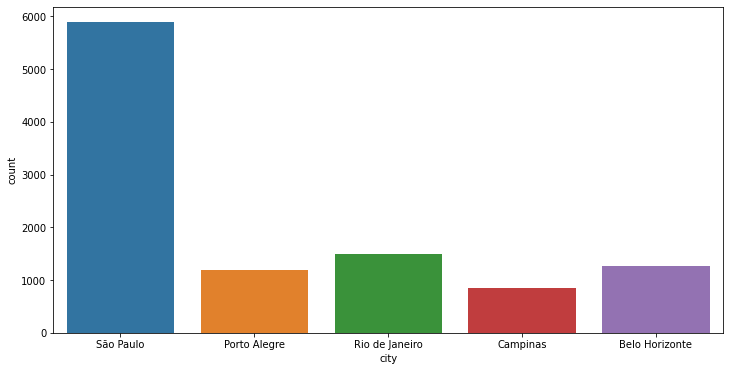

In [203]:
plt.figure(figsize=(12,6))
sns.countplot(x='city', data=df)

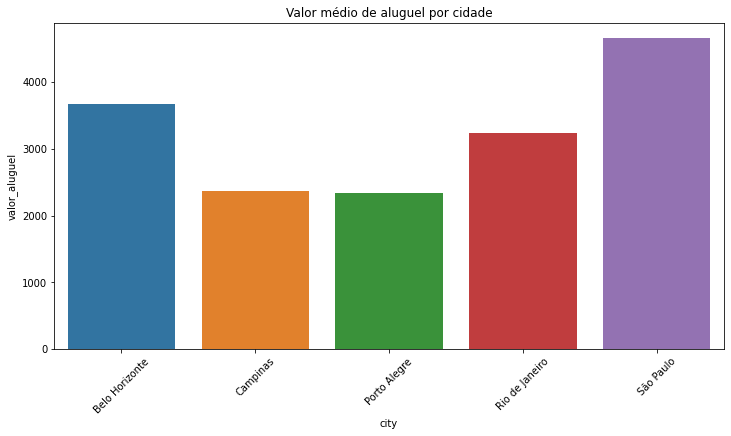

In [207]:
plt.figure(figsize=(12,6))
plt.title('Valor médio de aluguel por cidade')
sns.barplot(x='city', y='valor_aluguel', data=df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.xticks(rotation=45)
plt.show()

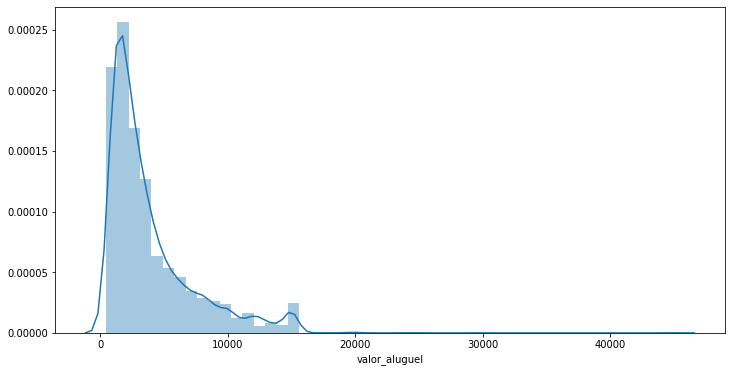

In [209]:
plt.figure(figsize=(12,6))
sns.distplot(df['valor_aluguel'])

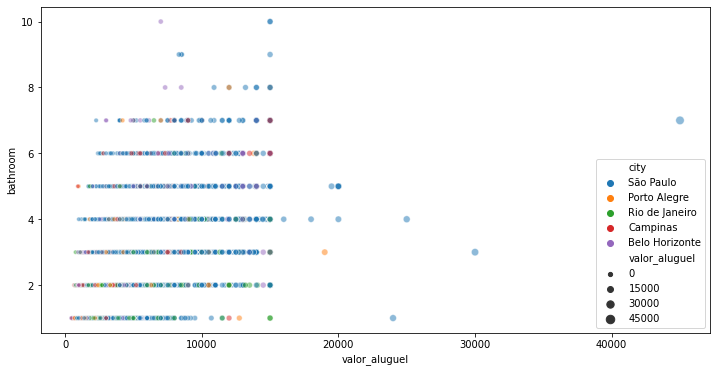

In [284]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='valor_aluguel', y='bathroom', data=df, hue='city', size='valor_aluguel', alpha=.5)

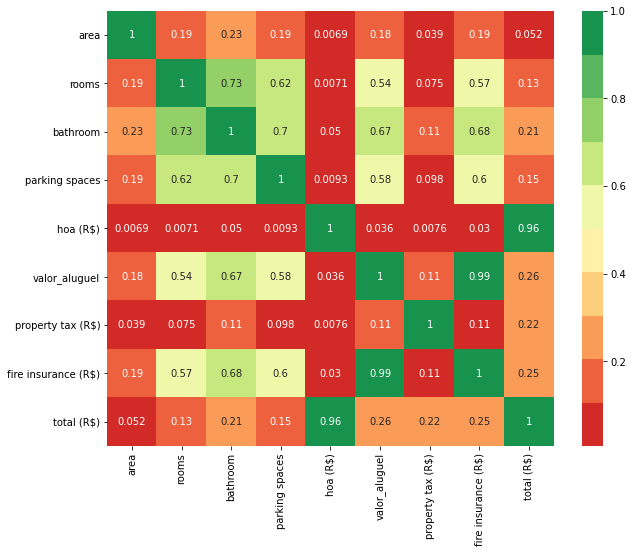

In [306]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes('int64').corr(), annot=True, cmap=sns.color_palette('RdYlGn',10))

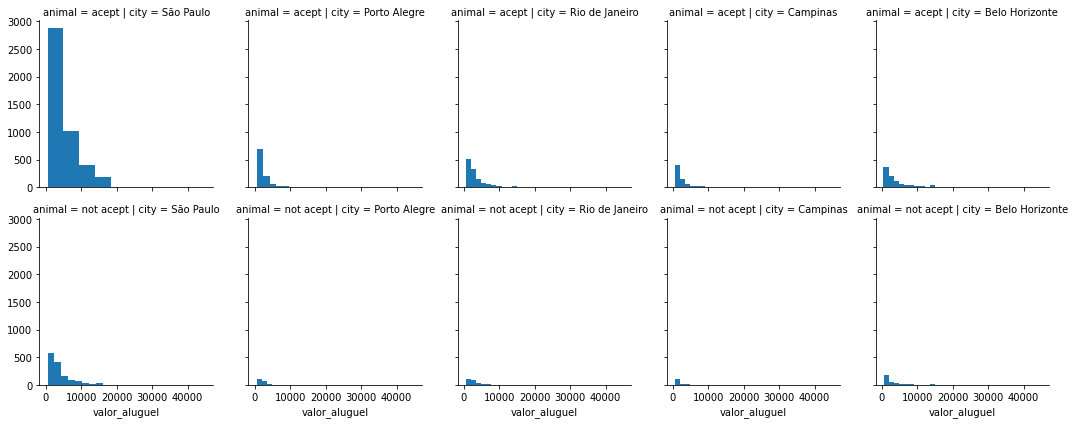

In [314]:
g = sns.FacetGrid(df, col='city', row='animal')
g.map(plt.hist, 'valor_aluguel')